In [42]:
"""
After determining which features to use for Naive Bayes (NB) Classification for my record data, 
I will reinmport the record data here, subset it to only include the desired features as
determined in feature selection, split it, and then create my NB model to predict a players rank.
"""
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score

In [28]:
#import record data
record_data_path = '../../data/cleaned_riot_data/league_combined_with_chall_cleaned.csv'
combined_league_ranks = pd.read_csv(record_data_path, index_col=None)

In [29]:
"""
Slightly clean the data again similar to the process in feature select:
Feature extract the time feature to transform the other time-dependent variables.

Also,
Subset the features to only include Objective Damage per min, Vision score per min, and minions per min.
These features were the ones that were determined from feature selection.
"""
#do this for variables: dmgObj, vision_score, and minions
#these were the features that I want based on what I found from feature selection
combined_league_ranks['dmgObj/min'] = combined_league_ranks['dmgObj']/combined_league_ranks['time']
combined_league_ranks['vision_score/min'] = combined_league_ranks['vision_score']/combined_league_ranks['time']
combined_league_ranks['minions/min'] = combined_league_ranks['totalMinions']/combined_league_ranks['time']



#remove the columns that did not include time as a rate
#also remove time, position, and win columns
combined_league_ranks = combined_league_ranks.drop('kills', axis=1)
combined_league_ranks = combined_league_ranks.drop('deaths', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgObj', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgTurr', axis=1)
combined_league_ranks = combined_league_ranks.drop('vision_score', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmg', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmgTaken', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalMinions', axis=1)
combined_league_ranks = combined_league_ranks.drop('gold', axis=1)
combined_league_ranks = combined_league_ranks.drop('time', axis=1)
combined_league_ranks = combined_league_ranks.drop('position', axis=1)
combined_league_ranks = combined_league_ranks.drop('win', axis=1)

In [30]:
"""
Split data into train, validation, and testing sets
"""

#split using sklearn's function train_test_split()
train_df, vali_test_df = train_test_split(combined_league_ranks, test_size=0.2, random_state=42)

#split vali_test_df to get validation and test set
vali_df, test_df = train_test_split(vali_test_df, test_size=0.5, random_state=42)


In [31]:
"""
First, create array for targets for training, validation, and testing sets

Then,
Typecast train_df, vali_df, and test_df into array for use.
"""
#first create y_train by changing class (rank) into numerics
y_train = []
for i in range(0,train_df.shape[0]):
    #convert strings to int tags
    #row i and column 0 (rank)
    if (train_df.iloc[i,0] == 'iron'):
        y_train.append(0)
    if (train_df.iloc[i,0] == 'bronze'):
        y_train.append(1)
    if (train_df.iloc[i,0] == 'silver'):
        y_train.append(2)
    if (train_df.iloc[i,0] == 'gold'):
        y_train.append(3)
    if (train_df.iloc[i,0] == 'platinum'):
        y_train.append(4)
    if (train_df.iloc[i,0] == 'emerald'):
        y_train.append(5)
    if (train_df.iloc[i,0] == 'diamond'):
        y_train.append(6)
    if (train_df.iloc[i,0] == 'challenger'):
        y_train.append(7)

#do same for validation: y_vali
y_vali = []
for i in range(0,vali_df.shape[0]):
    #convert strings to int tags
    #row i and column 0 (rank)
    if (vali_df.iloc[i,0] == 'iron'):
        y_vali.append(0)
    if (vali_df.iloc[i,0] == 'bronze'):
        y_vali.append(1)
    if (vali_df.iloc[i,0] == 'silver'):
        y_vali.append(2)
    if (vali_df.iloc[i,0] == 'gold'):
        y_vali.append(3)
    if (vali_df.iloc[i,0] == 'platinum'):
        y_vali.append(4)
    if (vali_df.iloc[i,0] == 'emerald'):
        y_vali.append(5)
    if (vali_df.iloc[i,0] == 'diamond'):
        y_vali.append(6)
    if (vali_df.iloc[i,0] == 'challenger'):
        y_vali.append(7)

#finally do it for testing: y_test
y_test = []
for i in range(0,test_df.shape[0]):
    #convert strings to int tags
    #row i and column 0 (rank)
    if (test_df.iloc[i,0] == 'iron'):
        y_test.append(0)
    if (test_df.iloc[i,0] == 'bronze'):
        y_test.append(1)
    if (test_df.iloc[i,0] == 'silver'):
        y_test.append(2)
    if (test_df.iloc[i,0] == 'gold'):
        y_test.append(3)
    if (test_df.iloc[i,0] == 'platinum'):
        y_test.append(4)
    if (test_df.iloc[i,0] == 'emerald'):
        y_test.append(5)
    if (test_df.iloc[i,0] == 'diamond'):
        y_test.append(6)
    if (test_df.iloc[i,0] == 'challenger'):
        y_test.append(7)


#now typecast everything into array for use
#first remove rank column in combined dataframes for train, vali, and test
train_features = train_df.iloc[:, 1:]
vali_features = vali_df.iloc[:, 1:]
test_features = test_df.iloc[:, 1:]
#typecast features into array
x_train = train_features.values
x_vali = vali_features.values
x_test = test_features.values
#typecast targets into array
y_train = np.array(y_train)
y_vali = np.array(y_vali)
y_test = np.array(y_test)

In [35]:
#train record data NB model with GaussianNB() from sklearn
train_nb = GaussianNB()
train_nb.fit(x_train, y_train)

#get training accuracy from training set
y_train_pred = train_nb.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training accuracy:", train_acc)

#test the model onto validation dataset
y_vali_pred = train_nb.predict(x_vali)
validation_acc = accuracy_score(y_vali, y_vali_pred)
print("Validation accuracy:", validation_acc)

#get accuracy from testing set
y_test_pred = train_nb.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Testing accuracy:", test_acc)

Training accuracy: 0.19491334683772227
Validation accuracy: 0.2
Testing accuracy: 0.19244604316546762


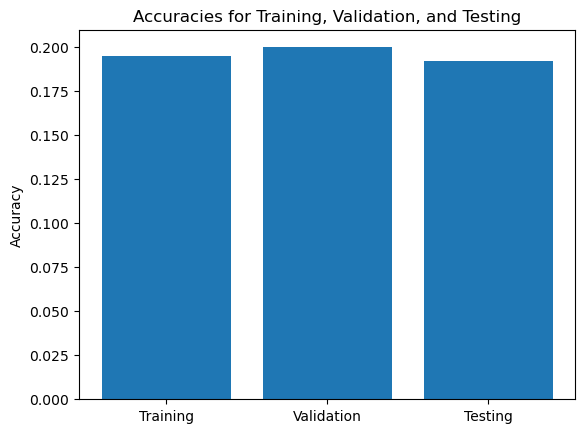

In [56]:
#group the found values first
accuracies_arr = np.array([train_acc, validation_acc, test_acc])
#plot the accuracies from all three sets (training, validation, and testing sets)
plt.bar(['Training','Validation','Testing'], accuracies_arr)
plt.title('Accuracies for Training, Validation, and Testing')
plt.ylabel('Accuracy')

#save plot as jpg
plt.savefig('accuracies_record.png')

plt.show()

In [43]:
#Calculate f1-score, precision, and recall using functions from sklearn

#f1_score for testing set
f1_score = metrics.f1_score(y_test, y_test_pred, average = 'micro')
print("F1-score for testing set:", f1_score)
#precision for testing set
precision_test = precision_score(y_test, y_test_pred, average=None)
print("Precision of each class for testing set:", precision_test)
#recall for testing set
recall_test = recall_score(y_test, y_test_pred, average=None)
print("Recall of each class for testing set:", recall_test)



F1-score for testing set: 0.1924460431654676
Precision of each class for testing set: [0.35416667 0.11764706 0.         0.15957447 0.125      0.08888889
 0.33333333 0.23076923]
Recall of each class for testing set: [0.52307692 0.03125    0.         0.61643836 0.07317073 0.05
 0.01234568 0.26315789]


c:\Users\xusha\anaconda3\envs\dsan5000\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


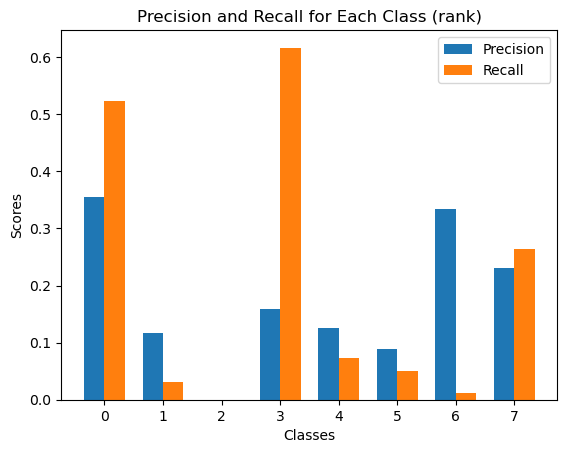

In [57]:
#group precision and recall together
grouped_metrics = np.array([precision_test, recall_test])

#get all possible classes:
classes = np.unique(y_test)

#plot bar plot for precision and recall for all classes (ranks)
width = 0.35 #width of each bar
index_num = np.arange(len(classes)) 

fig, ax = plt.subplots()
rects1 = ax.bar(index_num - width/2, grouped_metrics[0], width, label='Precision')
rects2 = ax.bar(index_num + width/2, grouped_metrics[1], width, label='Recall')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall for Each Class (rank)')
ax.set_xticks(index_num)
ax.set_xticklabels(classes)
ax.legend()

#save plot
plt.savefig('preci_recall_record.png')

plt.show()

In [46]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7])

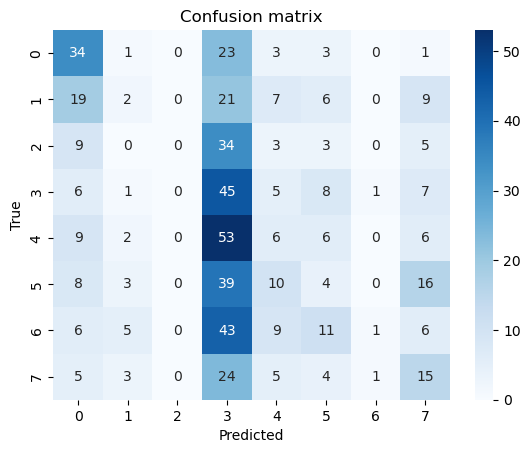

In [58]:
#get confusion matrix using metrics from sklearn
conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

#plot confusion matrix
plt.title("Confusion matrix")
axis = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4,5,6,7], yticklabels=[0,1,2,3,4,5,6,7])
axis.set(xlabel="Predicted", ylabel="True")
#save confusion matrix as .jpg
plt.savefig('conf_matrix_record.png')
plt.show()